In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
multiple = pd.read_csv('results_seagull.csv', index_col=False)
multiple

,Unnamed: 0,model,trainc1,trainc2,testc1,testc2
0,0,fcn8s,0.965538,0.022557,0.963915,0.032638
1,1,unet,0.998494,0.652435,0.997678,0.651114
2,2,fpn,0.998555,0.683393,0.997786,0.682000


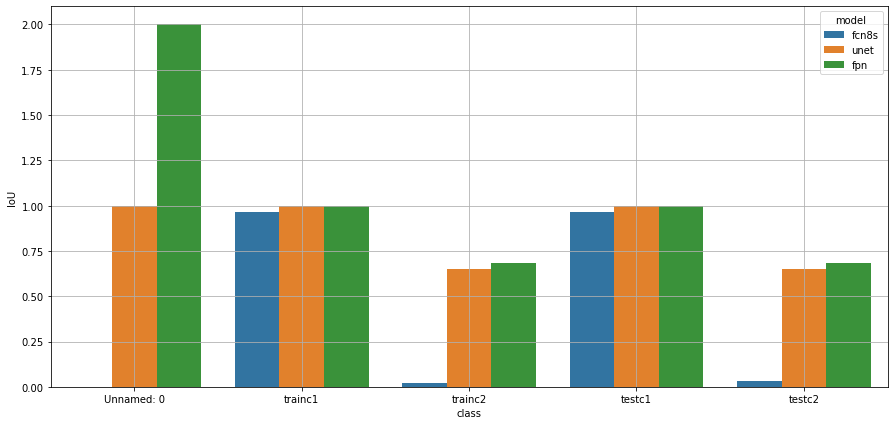

In [3]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=multiple.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [4]:
multiple.iloc[:,2:4]

,trainc1,trainc2
0,0.965538,0.022557
1,0.998494,0.652435
2,0.998555,0.683393


In [5]:
multiple.iloc[:,4:]

,testc1,testc2
0,0.963915,0.032638
1,0.997678,0.651114
2,0.997786,0.682000


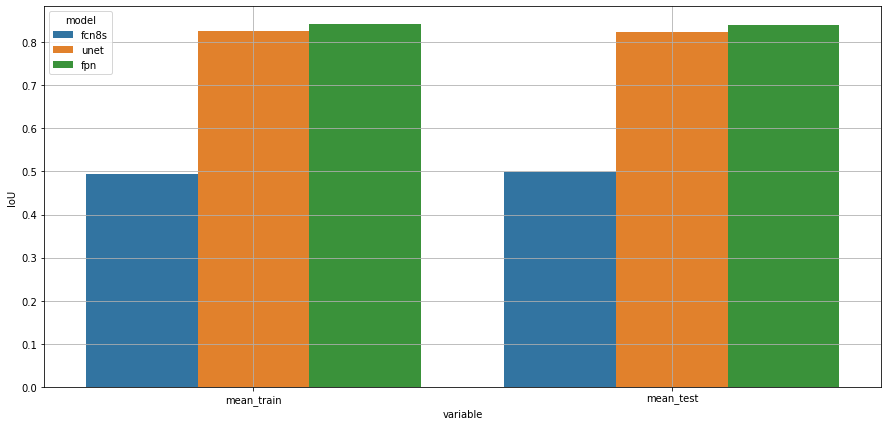

In [6]:
mean_results = multiple.copy()
mean_results['mean_train'] = multiple.iloc[:,2:4].mean(axis=1)
mean_results['mean_test'] = multiple.iloc[:,4:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [7]:
mean_results

,mean_train,mean_test,model
0,0.494048,0.498277,fcn8s
1,0.825465,0.824396,unet
2,0.840974,0.839893,fpn
